# Merging the scraped data
All the data was stored into separate batches, so they all must be merged into one large dataset.

In [1]:
import pandas as pd

First, the dates used are reconstructed

In [2]:
dates = []
for i in range(2013, 2023):
    dates.append(str(i) + "-01-01_" + str(i) + "-06-01")
    dates.append(str(i) + "-06-01_" + str(i + 1) + "-01-01")
    
dates.append("2023-01-01_2023-03-30")
dates

['2013-01-01_2013-06-01',
 '2013-06-01_2014-01-01',
 '2014-01-01_2014-06-01',
 '2014-06-01_2015-01-01',
 '2015-01-01_2015-06-01',
 '2015-06-01_2016-01-01',
 '2016-01-01_2016-06-01',
 '2016-06-01_2017-01-01',
 '2017-01-01_2017-06-01',
 '2017-06-01_2018-01-01',
 '2018-01-01_2018-06-01',
 '2018-06-01_2019-01-01',
 '2019-01-01_2019-06-01',
 '2019-06-01_2020-01-01',
 '2020-01-01_2020-06-01',
 '2020-06-01_2021-01-01',
 '2021-01-01_2021-06-01',
 '2021-06-01_2022-01-01',
 '2022-01-01_2022-06-01',
 '2022-06-01_2023-01-01',
 '2023-01-01_2023-03-30']

We combine these with the full path and filename

In [3]:
prefix = "data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_"
filenames = [prefix + x + ".csv" for x in dates]
filenames

['data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2013-01-01_2013-06-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2013-06-01_2014-01-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2014-01-01_2014-06-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2014-06-01_2015-01-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2015-01-01_2015-06-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2015-06-01_2016-01-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2016-01-01_2016-06-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2016-06-01_2017-01-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2017-01-01_2017-06-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2017-06-01_2018-01-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2018-01-01_2018-06-01.csv',
 'data/scraped_twitter/twitter_sentiment_$AAPL_AAPL_2018-06-01_2019-01-01.csv',
 'data/scraped_twitter/twitter_sentiment

Then we build the full dataframe

In [4]:
twitter_sentiment = pd.concat(map(pd.read_csv, filenames), ignore_index=True)
twitter_sentiment

,Date,vader_polarity
0,2013-01-01,0.051079
1,2013-01-02,0.026804
2,2013-01-03,0.076053
3,2013-01-04,0.105143
4,2013-01-05,0.062542
...,...,...
3733,2023-03-25,0.127080
3734,2023-03-26,0.141490
3735,2023-03-27,0.154446
3736,2023-03-28,0.171291


# Visualization

## Sentiment over time

We were curious about the sentiment over the decade, so we will plot the VADER polarity on a time-series graph.

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'VADER Polarity')

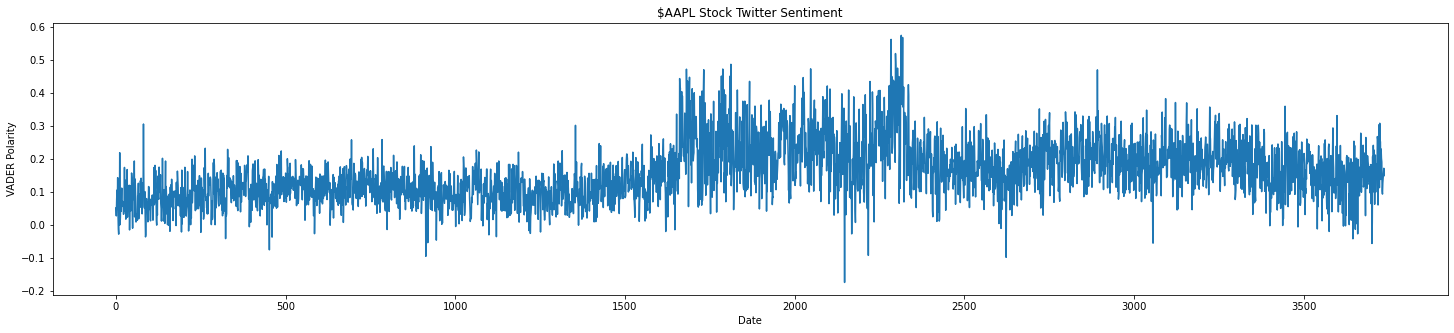

In [6]:
plt.figure(figsize=(25,5))
plt.plot(twitter_sentiment.index, twitter_sentiment.vader_polarity)
plt.title("$AAPL Stock Twitter Sentiment")
plt.xlabel("Date")
plt.ylabel("VADER Polarity")

## Number of Tweets per day
The number of Tweets collected for each day is also graphed to see its relevancy over time

In [7]:
prefix = "data/scraped_twitter/original/$AAPL_AAPL_"
filenames = [prefix + x + ".csv" for x in dates]
twitter_scraped = pd.concat(map(pd.read_csv, filenames), ignore_index=True)
twitter_scraped.shape

(208173, 11)

In [8]:
twitter_scraped[['Date', 'Time']] = twitter_scraped['Timestamp'].str.split('T', expand=True)

In [9]:
count_byday = pd.DataFrame(twitter_scraped.groupby('Date').size(), columns=["Number_tweets"])
count_byday['Date'] = count_byday.index
count_byday = count_byday[['Date', 'Number_tweets']]
count_byday = count_byday.reset_index(drop=True)
count_byday

,Date,Number_tweets
0,2013-01-01,94
1,2013-01-02,100
2,2013-01-03,83
3,2013-01-04,82
4,2013-01-05,84
...,...,...
3733,2023-03-25,100
3734,2023-03-26,90
3735,2023-03-27,91
3736,2023-03-28,81


Text(0, 0.5, 'Number of Tweets')

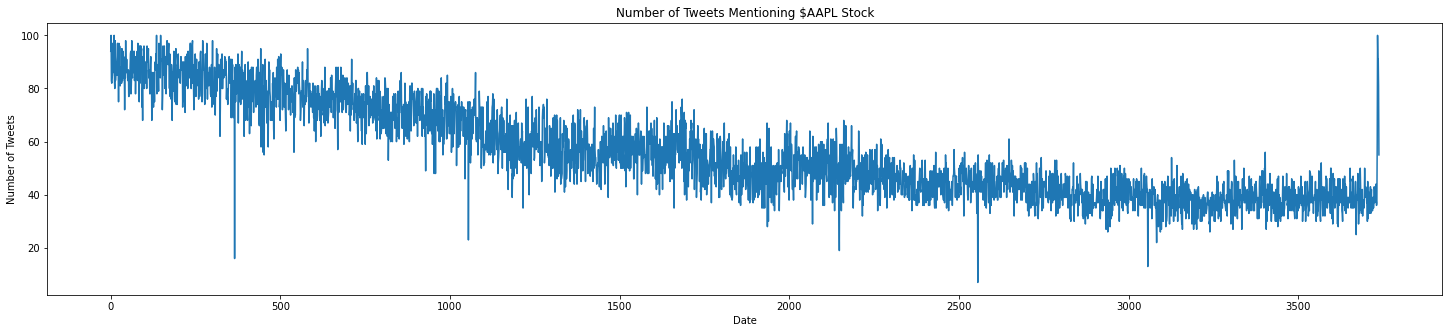

In [10]:
plt.figure(figsize=(25,5))
plt.plot(count_byday.index, count_byday.Number_tweets)
plt.title("Number of Tweets Mentioning $AAPL Stock")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")

# Joining with the technical indicator dataset

The Twitter sentiment is ultimately only one feature in our dataset, which is comprised mostly of technical stock indicators. Here we will join to make the final dataset

First, we import the technical indicator dataset, created by Andrew Istfan

In [11]:
stock = pd.read_csv("data/stockdata_2023-04-03.csv")
stock.head()

,open_aapl,high_aapl,low_aapl,close_aapl,volume_aapl,datetime,open_googl,high_googl,low_googl,close_googl,...,ema12,ema,macd,momentum,rsi_5,rsi_15,rsi_ratio,tr,atr,roc
0,16.421786,16.535714,16.270714,16.313214,398749904,2013-05-09 05:00:00,21.792098,22.012812,21.726785,21.808114,...,15.865621,16.373799,0.329583,15.313214,66.171526,64.804242,1.021099,0.295000,0.419158,0.165081
1,16.356071,16.418214,16.088572,16.177500,334849928,2013-05-10 05:00:00,21.903956,22.034833,21.825130,22.027075,...,15.913924,16.242933,0.325128,15.177500,57.572386,61.822287,0.931256,0.329643,0.412934,0.159885
2,16.125357,16.353572,16.125000,16.240714,317109240,2013-05-13 05:00:00,21.993543,22.083127,21.855684,21.959510,...,15.964484,16.241454,0.322504,15.240714,60.556778,62.679325,0.966136,0.228572,0.404487,0.140643
3,16.208928,16.257143,15.791071,15.852143,447115760,2013-05-14 05:00:00,21.958759,22.238780,21.949751,22.198992,...,15.947118,15.981913,0.288120,14.852143,39.310535,54.606048,0.719893,0.466071,0.379742,0.092901
4,15.684286,15.750000,15.084286,15.316071,741612360,2013-05-15 05:00:00,22.409198,22.931701,22.372159,22.919439,...,15.849641,15.538019,0.218220,14.316071,24.492002,45.872465,0.533915,0.767857,0.412962,0.057682


The `datetime` field is split to retrieve the `Date` and `Time`

In [12]:
stock[['Date', 'Time']] = stock['datetime'].str.split(' ', expand=True)

In [13]:
# removing unecessary columns
stock = stock.drop(['datetime', 'Time'], axis=1)
# reorder
stock.insert(0, 'Date', stock.pop('Date'))

In [14]:
stock.shape

(2492, 50)

The datasets are left-merged to keep all the technical indicator data

In [15]:
df = pd.merge(stock, twitter_sentiment, how='left', on=['Date'])
df

,Date,open_aapl,high_aapl,low_aapl,close_aapl,volume_aapl,open_googl,high_googl,low_googl,close_googl,...,ema,macd,momentum,rsi_5,rsi_15,rsi_ratio,tr,atr,roc,vader_polarity
0,2013-05-09,16.421786,16.535714,16.270714,16.313214,398749904,21.792098,22.012812,21.726785,21.808114,...,16.373799,0.329583,15.313214,66.171526,64.804242,1.021099,0.295000,0.419158,0.165081,0.131248
1,2013-05-10,16.356071,16.418214,16.088572,16.177500,334849928,21.903956,22.034833,21.825130,22.027075,...,16.242933,0.325128,15.177500,57.572386,61.822287,0.931256,0.329643,0.412934,0.159885,0.146785
2,2013-05-13,16.125357,16.353572,16.125000,16.240714,317109240,21.993543,22.083127,21.855684,21.959510,...,16.241454,0.322504,15.240714,60.556778,62.679325,0.966136,0.228572,0.404487,0.140643,0.063889
3,2013-05-14,16.208928,16.257143,15.791071,15.852143,447115760,21.958759,22.238780,21.949751,22.198992,...,15.981913,0.288120,14.852143,39.310535,54.606048,0.719893,0.466071,0.379742,0.092901,0.049072
4,2013-05-15,15.684286,15.750000,15.084286,15.316071,741612360,22.409198,22.931701,22.372159,22.919439,...,15.538019,0.218220,14.316071,24.492002,45.872465,0.533915,0.767857,0.412962,0.057682,0.011088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,2023-03-27,159.940000,160.770000,157.870000,158.280000,52390266,104.615000,104.760000,101.927300,102.460000,...,158.756022,2.923728,157.280000,58.221301,60.577495,0.961104,2.900000,3.498250,0.028928,0.154446
2488,2023-03-28,157.970000,158.490000,155.980000,157.650000,45992152,102.440000,102.450000,99.740000,101.030000,...,158.018674,2.811818,156.650000,53.185052,59.113390,0.899712,2.510000,3.543964,0.039908,0.171291
2489,2023-03-29,159.370000,161.050000,159.350000,160.770000,51305691,102.280000,102.490000,100.650000,101.390000,...,159.852891,2.940983,159.770000,69.511345,63.760854,1.090188,3.400000,3.478964,0.051678,0.149073
2490,2023-03-30,161.530000,162.470000,161.271000,162.360000,49501689,100.910000,101.155000,99.780000,100.890000,...,161.524297,3.135504,161.360000,75.053359,65.878571,1.139268,1.700000,3.362507,0.078159,NaN


We check to see which rows have a NaN `vader_polarity` value, which is a result of not having any Tweets that mention the Apple stock that day.

In [16]:
df[df['vader_polarity'].isnull()]

,Date,open_aapl,high_aapl,low_aapl,close_aapl,volume_aapl,open_googl,high_googl,low_googl,close_googl,...,ema,macd,momentum,rsi_5,rsi_15,rsi_ratio,tr,atr,roc,vader_polarity
1305,2018-07-16,47.88,48.1625,47.60375,47.7275,60172440,60.1905,60.4355,59.670055,59.8255,...,47.731647,0.248397,46.7275,63.625891,57.636547,1.103916,0.55875,0.742302,0.032392,NaN
2025,2021-05-25,127.82,128.3200,126.32000,126.9000,72009482,118.6000,119.2000,117.750000,118.1435,...,126.821115,-0.960259,125.9000,53.294134,47.904761,1.112502,2.00000,2.765586,-0.007431,NaN
2490,2023-03-30,161.53,162.4700,161.27100,162.3600,49501689,100.9100,101.1550,99.780000,100.8900,...,161.524297,3.135504,161.3600,75.053359,65.878571,1.139268,1.70000,3.362507,0.078159,NaN
2491,2023-03-31,162.44,165.0000,161.91000,164.9000,68749792,101.3000,103.8900,101.040000,103.7300,...,163.774766,3.454795,163.9000,81.696912,68.981102,1.184338,3.09000,3.194650,0.110438,NaN


We then impute these values with 0, which assumes there was a neutral sentiment that day.

In [17]:
df['vader_polarity'] = df['vader_polarity'].fillna(0)

## Comparing Sentiment vs. Stock Price

### Time-series Plots

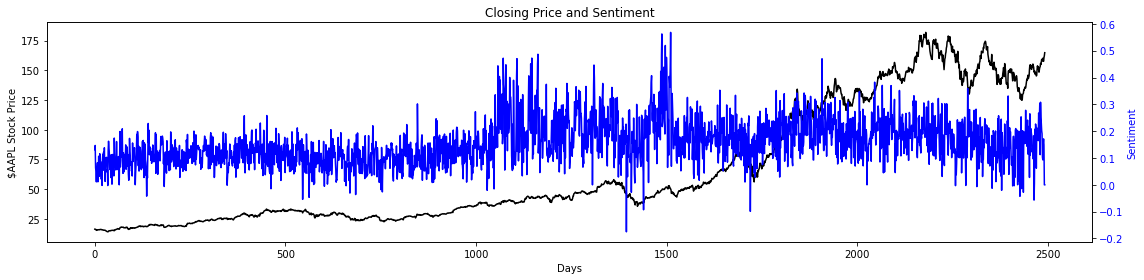

In [18]:
fig, ax1 = plt.subplots(figsize=(16, 4))

color = 'black'
ax1.set_title("Closing Price and Sentiment")
ax1.set_xlabel('Days')
ax1.set_ylabel('$AAPL Stock Price')
ax1.plot(df.index, df.close_aapl, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df.vader_polarity, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

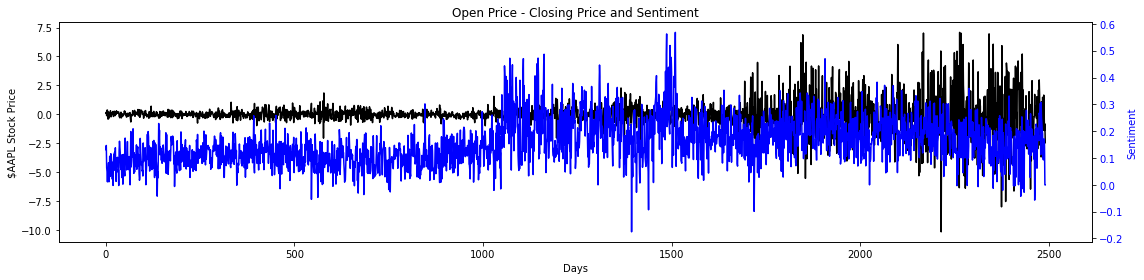

In [19]:
fig, ax1 = plt.subplots(figsize=(16, 4))

color = 'black'
ax1.set_title("Open Price - Closing Price and Sentiment")
ax1.set_xlabel('Days')
ax1.set_ylabel('$AAPL Stock Price')
ax1.plot(df.index, df.open_aapl - df.close_aapl, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df.vader_polarity, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

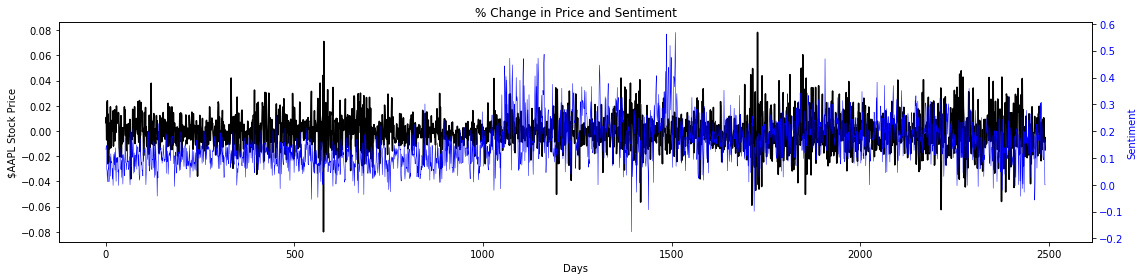

In [20]:
fig, ax1 = plt.subplots(figsize=(16, 4))

color = 'black'
ax1.set_title("% Change in Price and Sentiment")
ax1.set_xlabel('Days')
ax1.set_ylabel('$AAPL Stock Price')
ax1.plot(df.index, (df.open_aapl - df.close_aapl)/df.close_aapl, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df.vader_polarity, color=color, linewidth=.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Correlations

Text(0, 0.5, 'Vader Polarity')

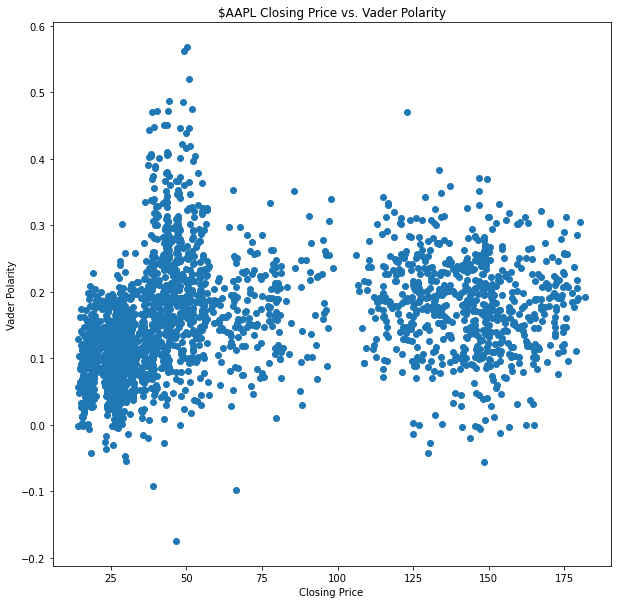

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(df.close_aapl, df.vader_polarity)
plt.title("$AAPL Closing Price vs. Vader Polarity")
plt.xlabel("Closing Price")
plt.ylabel("Vader Polarity")

Text(0, 0.5, 'Vader Polarity')

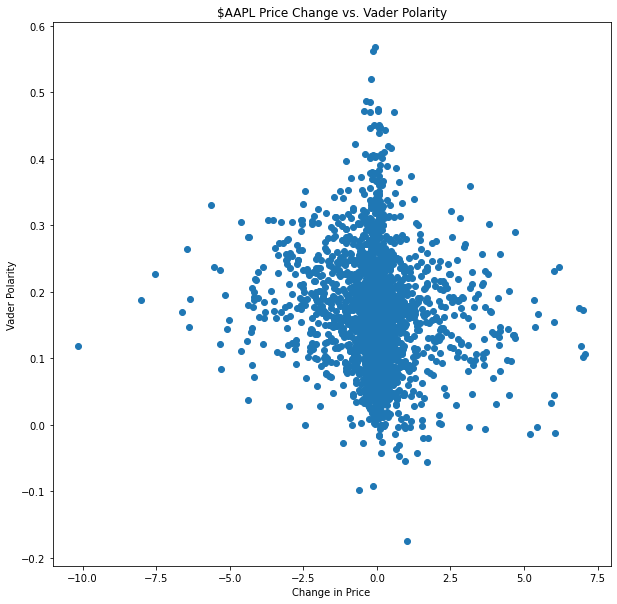

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(df.open_aapl - df.close_aapl, df.vader_polarity)
plt.title("$AAPL Price Change vs. Vader Polarity")
plt.xlabel("Change in Price")
plt.ylabel("Vader Polarity")

Text(0, 0.5, 'Vader Polarity')

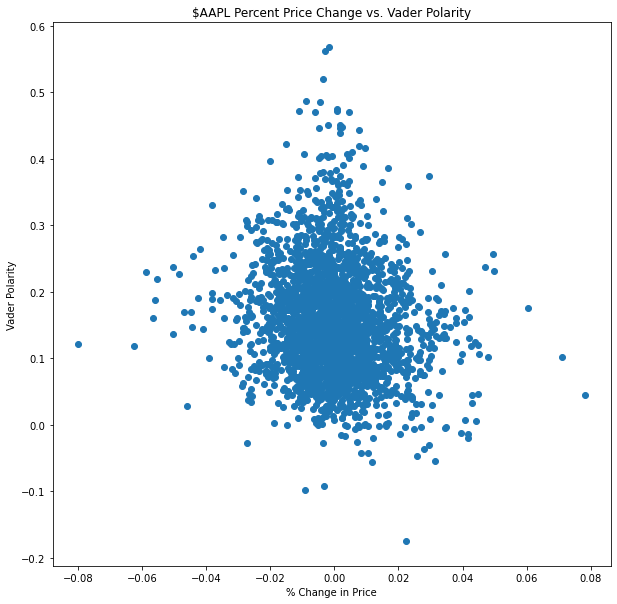

In [23]:
plt.figure(figsize=(10,10))
plt.scatter((df.open_aapl - df.close_aapl)/df.close_aapl, df.vader_polarity)
plt.title("$AAPL Percent Price Change vs. Vader Polarity")
plt.xlabel("% Change in Price")
plt.ylabel("Vader Polarity")

The dataset can now be exported

In [24]:
df.to_csv("data/fulldata.csv")